In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import  roc_curve, auc,accuracy_score, classification_report, confusion_matrix, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier


In [ ]:

# Load the dataset
df = pd.read_csv('../../../data/XAUUSD_2010-2023.csv')
df = df.head(100_000)

# Convert the 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Create a target variable
# df['price_increase'] = (df['close'] > df['open']).astype(int)

# Label the data
# df['price_high'] = (df['high'] > df['close']).astype(int)
# df['price_low'] = (df['low'] < df['close']).astype(int)
df['price_high_same'] = (df['high'] == df['close']).astype(int)
df['price_low_same'] = (df['low'] == df['close']).astype(int)
df['price_same'] = (df['price_low_same'] | df['price_high_same']).astype(int)

# Select relevant features for classification
features = ['open', 'high', 'low', 'close',
            # 'rsi14', 'sma14'
            ]
X = df[features]
y = df['price_same']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [24]:
X_train

array([[ 0.71935619,  0.7188319 ,  0.71651567,  0.72066761],
       [-0.26781427, -0.27008053, -0.2657561 , -0.26863097],
       [-0.45023136, -0.45000491, -0.44995677, -0.44685804],
       ...,
       [ 0.42612941,  0.42393608,  0.42851437,  0.42649414],
       [-1.14828496, -1.15168628, -1.15039362, -1.15146752],
       [-1.41740549, -1.41797752, -1.41839373, -1.421772  ]])

In [22]:

# Create a DataFrame for visualization
train_df = pd.DataFrame(X_train, columns=['c', 'Feature2'])
train_df['Type'] = 'Train'
train_df['Target'] = y_train

test_df = pd.DataFrame(X_test, columns=['Feature1', 'Feature2'])
test_df['Type'] = 'Test'
test_df['Target'] = y_test

df = pd.concat([train_df, test_df])

ValueError: Shape of passed values is (80000, 4), indices imply (80000, 2)

In [0]:

# Plot the data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Feature1', y='Feature2', hue='Target', style='Type', s=100)
plt.title('Training and Testing Data Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Type/Target')
plt.show()

TypeError: functools.partial(<class 'matplotlib.lines.Line2D'>, xdata=[], ydata=[]) got multiple values for keyword argument 'label'

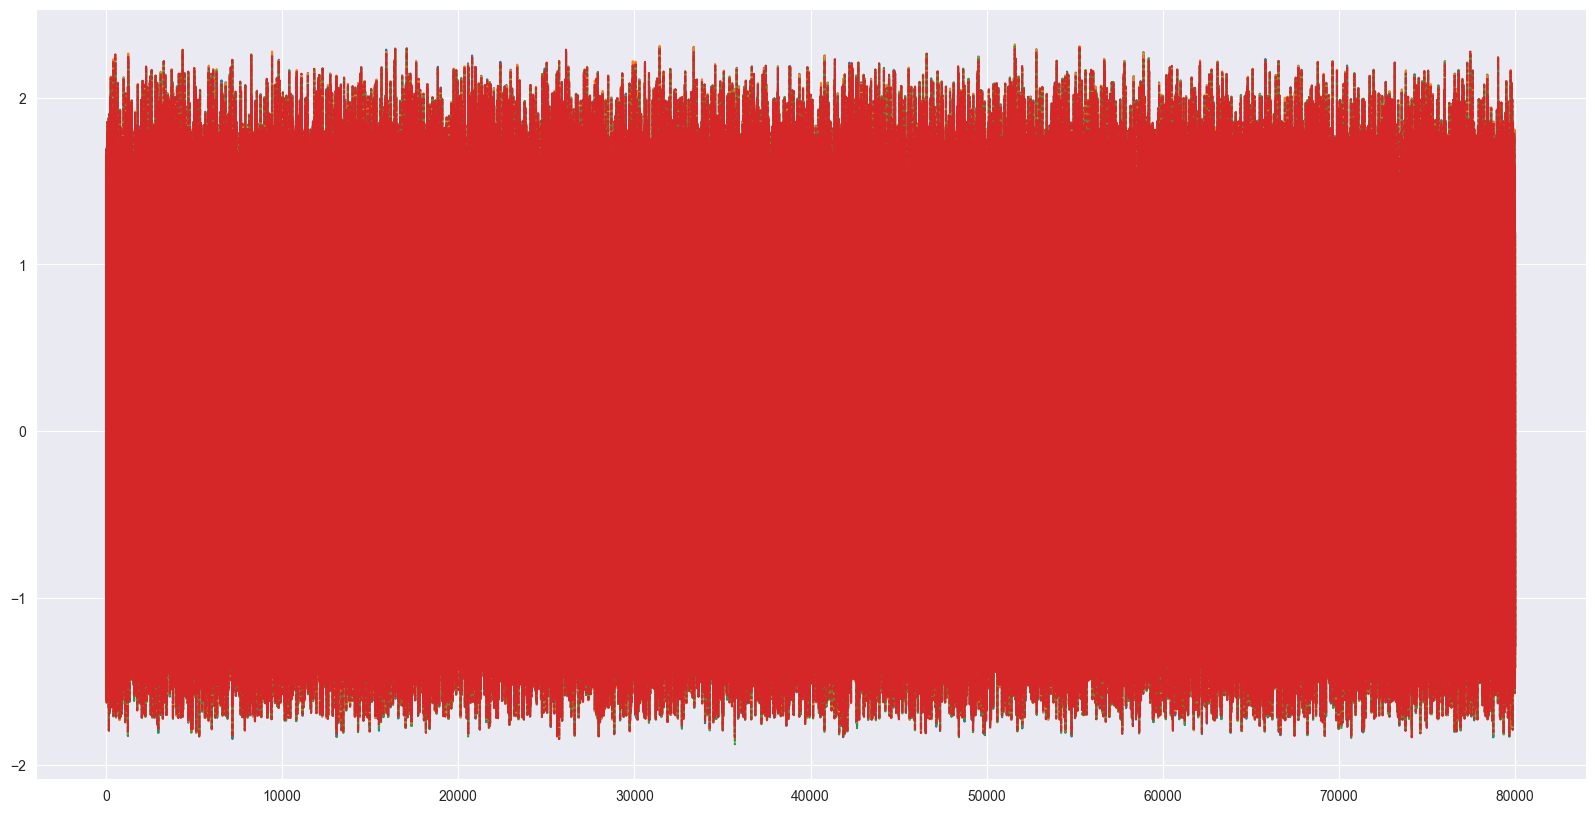

In [11]:
# plt.figure(
#     figsize=(
#         20,  #panjang
#         10  # lebar
#     ))
# sns.lineplot(
#     X_train,
#    
#     label='close_train', color='grey',
#     # linewidth=6
# )
# 
# sns.lineplot(
#     X_train,
#    
#     label='close_test', color='blue')
# # sns.lineplot(df['high'], label='high' ,color='red')
# # sns.lineplot(df['low'],label='low' ,color='green')
# plt.title('Closing price of Gold')
# plt.show()

In [16]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

Confusion Matrix:
[[15706   592]
 [ 3222   480]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     16298
           1       0.45      0.13      0.20      3702

    accuracy                           0.81     20000
   macro avg       0.64      0.55      0.55     20000
weighted avg       0.76      0.81      0.76     20000


Accuracy Score:
0.8093


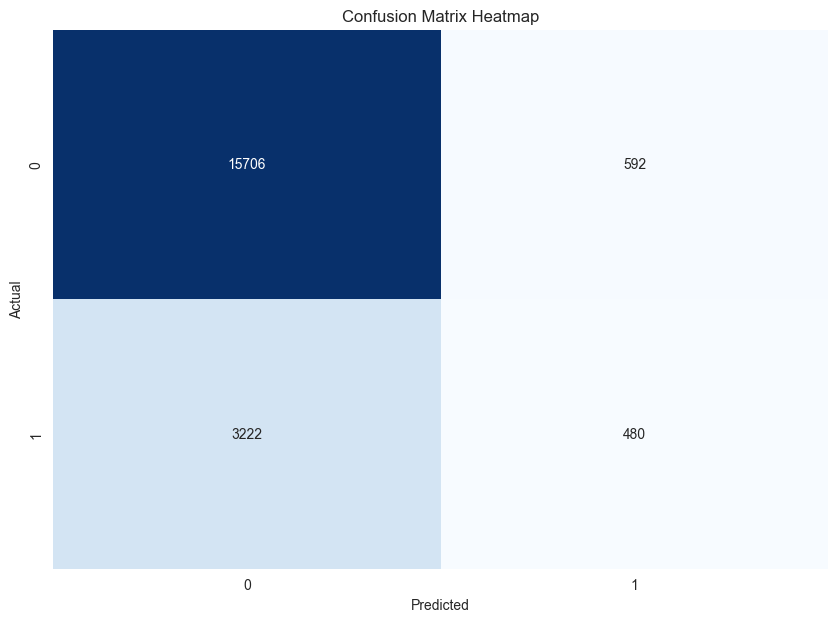

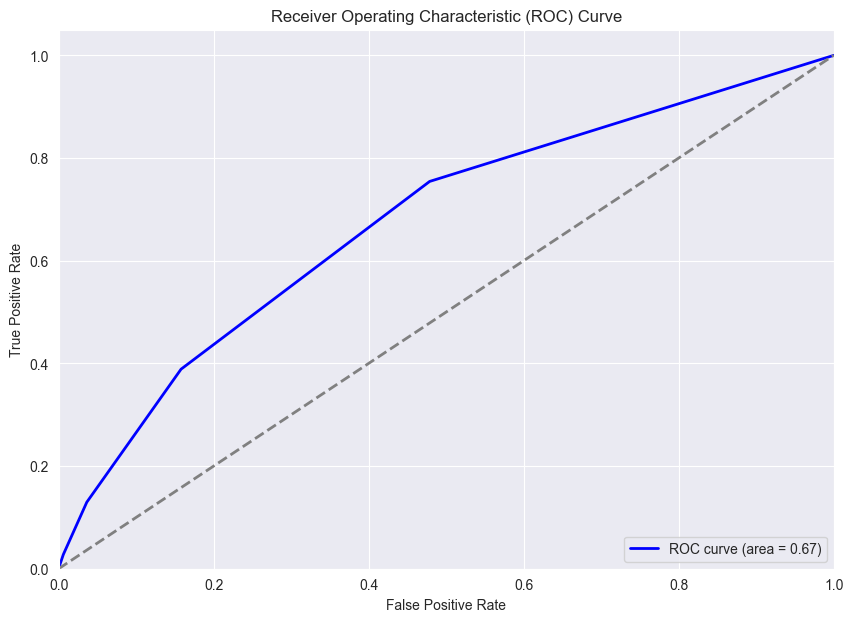

In [17]:

# Evaluate the model's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Visualize the classifier's performance
# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# ROC Curve
y_prob = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [21]:
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred):.3f}')

MAPE: 133306548970166.828
